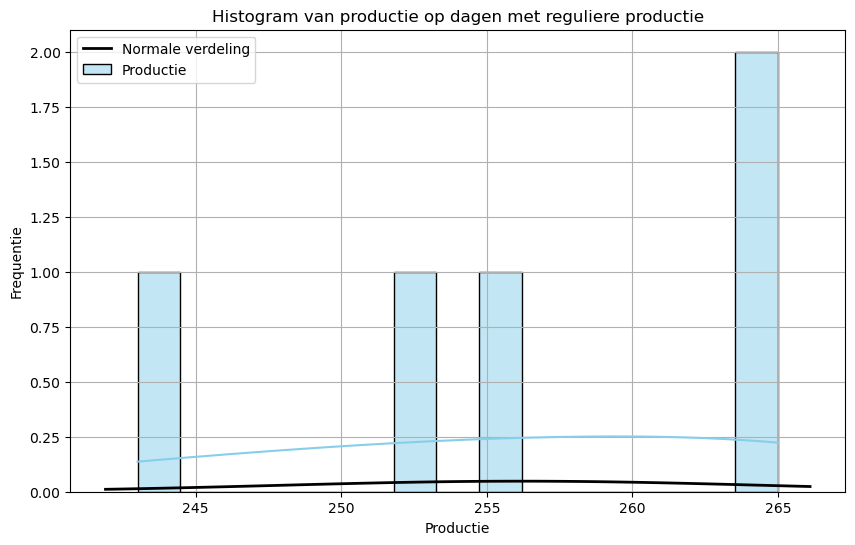

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# Voorbeeld DataFrame
data = {
    'date_String': ['20180101', '20180102', '20180103', '20180104', '20180105'],
    'DoW': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'hour': [1, 1, 1, 1, 1],
    'minute': [0, 0, 0, 0, 0],
    'date_datetime': ['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05'],
    'maintenance': ['No', 'No', 'No', 'No', 'No'],
    'prod_loss': [9, 9, 18, 22, 31],
    'prod_loss_perc': [3, 3, 6, 8, 11],
    'production': [265, 265, 256, 252, 243]
}

df = pd.DataFrame(data)
df['date_datetime'] = pd.to_datetime(df['date_datetime'])
df.set_index('date_datetime', inplace=True)

# Filter de gegevens om alleen dagen met reguliere productie te behouden
regular_production = df[df['production'] > 0]['production']

# Bepaal de parameters van de beste normale verdeling voor de productie op deze dagen
mu, sigma = norm.fit(regular_production)

# Plot histogram van de productie op dagen met reguliere productie
plt.figure(figsize=(10, 6))
sns.histplot(regular_production, bins=15, kde=True, color='skyblue', label='Productie')

# Plot de best passende normale verdeling
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normale verdeling')

plt.title('Histogram van productie op dagen met reguliere productie')
plt.xlabel('Productie')
plt.ylabel('Frequentie')
plt.legend()
plt.grid(True)
plt.show()